# ① Background
3양봉 진입금지는 경험칙이다.  
실제로도 그럴까?   
유튜브: https://youtu.be/DLcOFbsOkKI

# ② Methods

### Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Load

In [16]:
df = pd.read_csv('data.csv')
df['매수시간'] = pd.to_datetime(df['매수시간'])
df.head()

,주문일자,종목명,매수가격,매수시간,매도시간,수익률,매매횟수,종목코드,뉴스기사,최대거래대금 시간,최대거래대금,매수등락률,단기과열,이격도
0,2022-03-29,고려시멘트,5230,2022-04-26 09:09:07,09:21:27,2.87,1,198440,1,09:06:00,113,16.22,True,4.38
1,2022-03-29,고려시멘트,5410,2022-04-26 09:28:09,09:32:19,1.85,2,198440,1,09:06:00,113,20.22,True,0.93
2,2022-03-29,영진약품,5490,2022-04-26 09:51:11,09:55:24,0.66,3,3520,1,09:50:00,62,6.60,False,1.57
3,2022-03-29,버킷스튜디오,5060,2022-04-26 09:58:16,09:59:56,-0.59,4,66410,1,09:22:00,72,11.58,False,0.87
4,2022-03-29,우리바이오,4390,2022-04-26 10:00:40,10:00:50,-0.57,5,82850,1,10:00:00,44,10.86,True,3.56


### 1분차트 데이터

In [20]:
frame = pd.read_csv('minute/2022-03-29_고려시멘트.csv')
frame['시간'] = pd.to_datetime(frame['시간'])
frame.head()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1
0,2022-03-29,2022-04-26 15:35:00,5090,5090,5090,5090,5082,5068.0,5043.75,5011.667,5058.750,37134,188670.4,104647.50,87611.38,82089.93
1,2022-03-29,2022-04-26 15:30:00,5090,5090,5090,5090,5076,5064.0,5038.75,5011.833,5059.000,407799,198766.0,105884.00,88337.77,85438.00
2,2022-03-29,2022-04-26 15:19:00,5080,5090,5070,5090,5070,5059.0,5033.75,5011.667,5060.083,182428,128182.0,87319.05,83187.48,82428.02
3,2022-03-29,2022-04-26 15:18:00,5070,5090,5060,5080,5060,5053.0,5028.75,5011.500,5061.083,161683,107055.4,79688.35,80869.27,81484.14
4,2022-03-29,2022-04-26 15:17:00,5060,5080,5060,5060,5054,5048.0,5024.00,5011.667,5062.167,154308,98743.2,76215.75,78556.47,81216.53


### Timedelta

In [29]:
frame['시차'] = df['매수시간'].iloc[0] - frame['시간']
frame.tail()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1,시차
376,2022-03-29,2022-04-26 09:04:00,4890,4920,4860,4920,4862,4687.5,4609.75,4565.583,4573.125,717010,700499.6,189483.40,66535.63,34778.41,00:05:07
377,2022-03-29,2022-04-26 09:03:00,4860,4895,4830,4895,4778,4648.5,4590.25,4559.667,4570.333,742941,558645.6,153859.80,54607.87,28814.29,00:06:07
378,2022-03-29,2022-04-26 09:02:00,4790,4860,4785,4860,4699,4612.0,4572.25,4554.250,4567.792,516988,434437.2,117156.80,42248.60,22630.70,00:07:07
379,2022-03-29,2022-04-26 09:01:00,4845,4845,4775,4790,4630,4579.5,4555.75,4549.500,4565.500,515116,340736.2,91443.65,33634.55,18328.23,00:08:07
380,2022-03-29,2022-04-26 09:00:00,4780,4845,4780,4845,4576,4553.5,4543.00,4545.833,4563.833,1010443,242446.2,65939.30,25112.58,14046.83,00:09:07


### Shift

In [36]:
frame['전일종가'] = frame['종가'].shift(-1, fill_value=0)
frame.tail()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1,시차,전일종가
376,2022-03-29,2022-04-26 09:04:00,4890,4920,4860,4920,4862,4687.5,4609.75,4565.583,4573.125,717010,700499.6,189483.40,66535.63,34778.41,00:05:07,4895
377,2022-03-29,2022-04-26 09:03:00,4860,4895,4830,4895,4778,4648.5,4590.25,4559.667,4570.333,742941,558645.6,153859.80,54607.87,28814.29,00:06:07,4860
378,2022-03-29,2022-04-26 09:02:00,4790,4860,4785,4860,4699,4612.0,4572.25,4554.250,4567.792,516988,434437.2,117156.80,42248.60,22630.70,00:07:07,4790
379,2022-03-29,2022-04-26 09:01:00,4845,4845,4775,4790,4630,4579.5,4555.75,4549.500,4565.500,515116,340736.2,91443.65,33634.55,18328.23,00:08:07,4845
380,2022-03-29,2022-04-26 09:00:00,4780,4845,4780,4845,4576,4553.5,4543.00,4545.833,4563.833,1010443,242446.2,65939.30,25112.58,14046.83,00:09:07,0


### 종가 - 전일종가

In [38]:
frame['종가차이'] = frame['종가'] - frame['전일종가']
frame.tail()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1,시차,전일종가,종가차이
376,2022-03-29,2022-04-26 09:04:00,4890,4920,4860,4920,4862,4687.5,4609.75,4565.583,4573.125,717010,700499.6,189483.40,66535.63,34778.41,00:05:07,4895,25
377,2022-03-29,2022-04-26 09:03:00,4860,4895,4830,4895,4778,4648.5,4590.25,4559.667,4570.333,742941,558645.6,153859.80,54607.87,28814.29,00:06:07,4860,35
378,2022-03-29,2022-04-26 09:02:00,4790,4860,4785,4860,4699,4612.0,4572.25,4554.250,4567.792,516988,434437.2,117156.80,42248.60,22630.70,00:07:07,4790,70
379,2022-03-29,2022-04-26 09:01:00,4845,4845,4775,4790,4630,4579.5,4555.75,4549.500,4565.500,515116,340736.2,91443.65,33634.55,18328.23,00:08:07,4845,-55
380,2022-03-29,2022-04-26 09:00:00,4780,4845,4780,4845,4576,4553.5,4543.00,4545.833,4563.833,1010443,242446.2,65939.30,25112.58,14046.83,00:09:07,0,4845


### 양봉

In [41]:
frame['양봉'] = frame['종가차이'] > 0
frame.tail()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1,시차,전일종가,종가차이,양봉
376,2022-03-29,2022-04-26 09:04:00,4890,4920,4860,4920,4862,4687.5,4609.75,4565.583,4573.125,717010,700499.6,189483.40,66535.63,34778.41,00:05:07,4895,25,True
377,2022-03-29,2022-04-26 09:03:00,4860,4895,4830,4895,4778,4648.5,4590.25,4559.667,4570.333,742941,558645.6,153859.80,54607.87,28814.29,00:06:07,4860,35,True
378,2022-03-29,2022-04-26 09:02:00,4790,4860,4785,4860,4699,4612.0,4572.25,4554.250,4567.792,516988,434437.2,117156.80,42248.60,22630.70,00:07:07,4790,70,True
379,2022-03-29,2022-04-26 09:01:00,4845,4845,4775,4790,4630,4579.5,4555.75,4549.500,4565.500,515116,340736.2,91443.65,33634.55,18328.23,00:08:07,4845,-55,False
380,2022-03-29,2022-04-26 09:00:00,4780,4845,4780,4845,4576,4553.5,4543.00,4545.833,4563.833,1010443,242446.2,65939.30,25112.58,14046.83,00:09:07,0,4845,True


### 매수 직전의 캔들만 필터링하기

In [51]:
frame = frame[frame['시차'] > '00:01:00']
frame = frame.reset_index(drop=True)
frame.head()

,날짜,시간,시가,고가,저가,종가,종가 단순 5,10,20,60,120,거래량,단순 5,20.1,60.1,120.1,시차,전일종가,종가차이,양봉
0,2022-03-29,2022-04-26 09:08:00,5150,5250,5150,5230,5093,4935.5,4730.75,4603.750,4591.458,1205130,1380594.0,497345.3,169306.40,86284.07,00:01:07,5160,70,True
1,2022-03-29,2022-04-26 09:07:00,5170,5250,5150,5160,5026,4862.5,4695.75,4592.667,4586.083,1622205,1288157.0,437452.4,149252.60,76249.43,00:02:07,5160,0,False
2,2022-03-29,2022-04-26 09:06:00,4995,5200,4985,5160,4966,4798.0,4664.25,4582.750,4581.333,2191679,1067113.0,356626.2,122218.40,62745.13,00:03:07,4995,165,True
3,2022-03-29,2022-04-26 09:05:00,4915,4995,4910,4995,4892,4734.0,4632.75,4572.833,4576.542,1166948,731800.6,247700.8,85920.50,44497.93,00:04:07,4920,75,True
4,2022-03-29,2022-04-26 09:04:00,4890,4920,4860,4920,4862,4687.5,4609.75,4565.583,4573.125,717010,700499.6,189483.4,66535.63,34778.41,00:05:07,4895,25,True


### 연속된 양봉 개수 세기

In [52]:
count = 0

for i in range(len(frame)):
    if frame['양봉'].iloc[i]:
        count += 1
    else:
        break

In [53]:
print(count)

1


# ③ 양봉개수 칼럼을 추가한 최종적인 데이터프레임 만들기
핵심코드이기 때문에 필요하다면 아래 코드만 '복사/붙여넣기' 하면 된다.

In [63]:
list = []

for i in range(len(df)):
    # 메인 데이터프레임
    df = pd.read_csv('data.csv')
    df['매수시간'] = pd.to_datetime(df['매수시간'])

    date = df.iloc[i]['주문일자']
    firm = df.iloc[i]['종목명']
    time = df.iloc[i]['매수시간']
    
    # 필터된 서브 데이터프레임 만들기
    frame = pd.read_csv('minute/'+date+'_'+firm+'.csv')
    frame['시간'] = pd.to_datetime(frame['시간'])
    frame['시차'] = time - frame['시간']
    frame['전일종가'] = frame['종가'].shift(-1, fill_value=0)
    frame['종가차이'] = frame['종가'] - frame['전일종가']
    frame['양봉'] = frame['종가차이'] > 0
    frame = frame[frame['시차'] > '00:01:00']
    frame = frame.reset_index(drop=True)

    # 양봉 개수 세기
    count = 0
    for j in range(len(frame)):
        if frame['양봉'].iloc[j]:
            count += 1
        else:
            break
    
    list.append(count)

df['양봉개수'] = list

In [64]:
df.head()

,주문일자,종목명,매수가격,매수시간,매도시간,수익률,매매횟수,종목코드,뉴스기사,최대거래대금 시간,최대거래대금,매수등락률,단기과열,이격도,양봉개수
0,2022-03-29,고려시멘트,5230,2022-04-26 09:09:07,09:21:27,2.87,1,198440,1,09:06:00,113,16.22,True,4.38,1
1,2022-03-29,고려시멘트,5410,2022-04-26 09:28:09,09:32:19,1.85,2,198440,1,09:06:00,113,20.22,True,0.93,2
2,2022-03-29,영진약품,5490,2022-04-26 09:51:11,09:55:24,0.66,3,3520,1,09:50:00,62,6.60,False,1.57,1
3,2022-03-29,버킷스튜디오,5060,2022-04-26 09:58:16,09:59:56,-0.59,4,66410,1,09:22:00,72,11.58,False,0.87,0
4,2022-03-29,우리바이오,4390,2022-04-26 10:00:40,10:00:50,-0.57,5,82850,1,10:00:00,44,10.86,True,3.56,3


# ④ Visualization

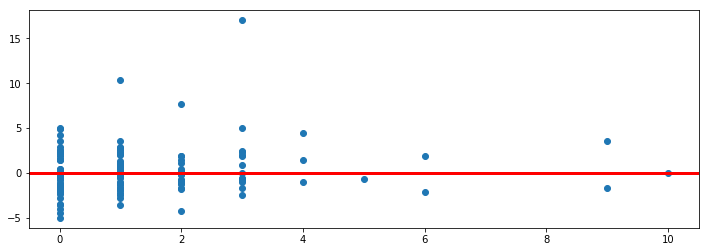

In [66]:
plt.scatter(df.양봉개수, df.수익률)
plt.axhline(y=0, color='r', linewidth=3)
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

# ⑤ 양봉개수와 수익률의 관계

In [72]:
df.groupby('양봉개수')['수익률'].mean()

양봉개수
0    -0.025319
1     0.291538
2     0.096500
3     1.740000
4     1.640000
5    -0.750000
6    -0.105000
9     0.940000
10    0.000000
Name: 수익률, dtype: float64

In [73]:
df.groupby('양봉개수')['수익률'].median()

양봉개수
0    -0.220
1     0.000
2     0.000
3     0.450
4     1.470
5    -0.750
6    -0.105
9     0.940
10    0.000
Name: 수익률, dtype: float64

# ⑥ Results
3양봉의 평균수익률(mean=1.7%)이 가장 높다.

# ⑦ Conclusion
3양봉은 적극진입한다.